In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(400, 9)

In [6]:
df.drop(columns=['Serial No.'],inplace=True)

In [7]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [14]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 41ms/step - loss: 0.1025 - val_loss: 0.0696
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0555 - val_loss: 0.0348
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0312 - val_loss: 0.0230
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0247 - val_loss: 0.0221
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0237 - val_loss: 0.0212
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.0185
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0198 - val_loss: 0.0163
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0182 - val_loss: 0.0149
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0171 - val_loss: 0.0139
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0161 - val_loss: 0.0132
Epoch 11/100
8/8 [==========

8/8 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 85/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 86/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 87/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 88/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 89/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 90/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 91/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 92/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.0042
Epoch 93/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 94/100
8/8 [===============

In [15]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 5ms/step


In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7285214157898181

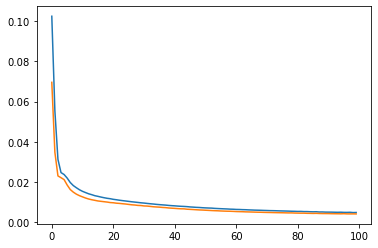

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])